In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_train = pd.read_excel('D:\ML_workspace\Flight_Fare_Prediction\Datasets\Data_Train.xlsx')
df_test = pd.read_excel('D:\ML_workspace\Flight_Fare_Prediction\Datasets\Test_set.xlsx')

In [3]:
from datetime import datetime
datetime.today()

datetime.datetime(2021, 1, 17, 12, 28, 37, 427677)

In [4]:
datetime.today().strftime('%A')

'Sunday'

In [5]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
df_train.shape

(10683, 11)

In [9]:
df_test.shape

(2671, 10)

## Columns and EXPLORIATORY DATA ANALYSIS (EDA)

In [10]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
df_train.dropna( inplace =True)
df_test.dropna( inplace =True)

In [13]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
df_train.shape

(10682, 11)

In [15]:
df_test.shape

(2671, 10)

## Airline ------> Categorical feature

if data is nominal ------> (not in any order) ------> onehotencoding 

else: ( if there is order) -----> labelEncoding

In [16]:
df_train["Airline"].describe()

count           10682
unique             12
top       Jet Airways
freq             3849
Name: Airline, dtype: object

In [17]:
df_train["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [18]:
len(df_train["Airline"].unique())

12

<AxesSubplot:xlabel='count', ylabel='Airline'>

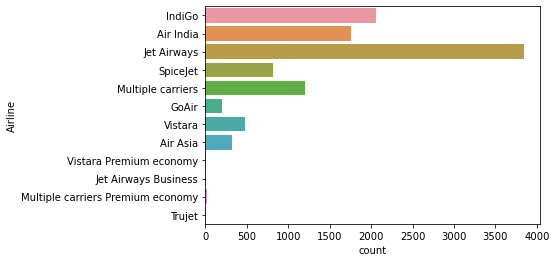

In [19]:
sns.countplot(y=df_train["Airline"])

In [20]:
df_test["Airline"].unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)

In [21]:
len(df_test["Airline"].unique())

11

<AxesSubplot:xlabel='count', ylabel='Airline'>

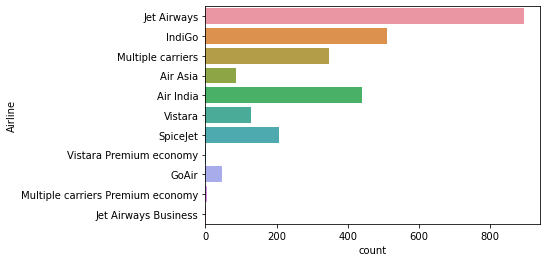

In [22]:
sns.countplot(y=df_test["Airline"])

In [23]:
df_test["Airline"].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

In [24]:
df_train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [25]:
for i in df_train.Airline.unique():
    if i not in (df_test.Airline.unique()):
        print(i)

Trujet


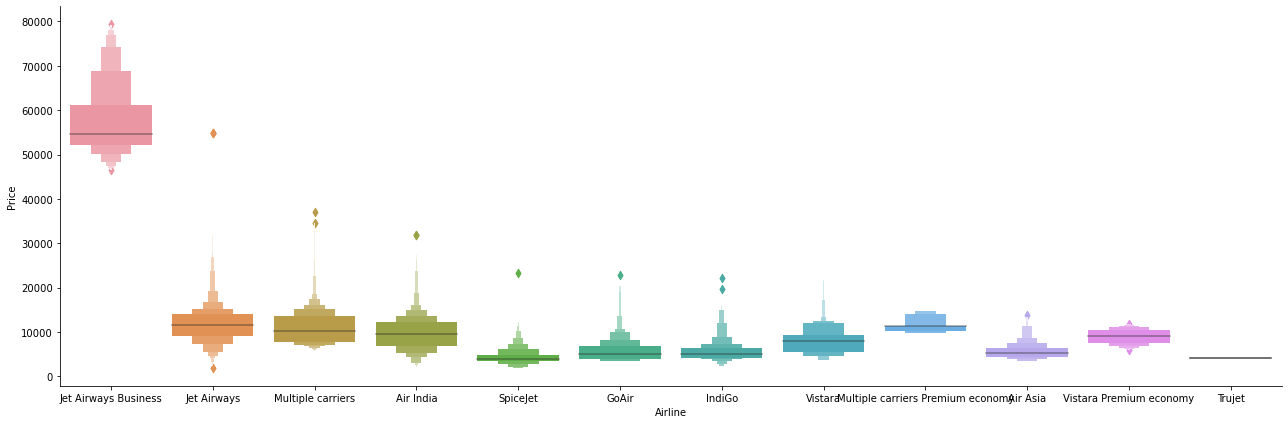

In [26]:
sns.catplot(y = 'Price', x= 'Airline', data=df_train.sort_values('Price', ascending= False), kind = 'boxen' , height=6, aspect=3)
plt.show()

In [27]:
Airline = df_train[['Airline']]

In [28]:
type(Airline)

pandas.core.frame.DataFrame

In [29]:
Airlinedd = df_train['Airline']

In [30]:
type(Airlinedd)

pandas.core.series.Series

In [31]:
Airline = pd.get_dummies(Airline, drop_first=True)

In [32]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [33]:
### for test is remaining.....

## Date_of_Journey

In [34]:
type(df_train['Date_of_Journey'][0])

str

In [35]:
df_train['journey_day'] = pd.to_datetime(df_train['Date_of_Journey'], format='%d/%m/%Y').dt.day
df_test['journey_day'] = pd.to_datetime(df_test['Date_of_Journey'], format='%d/%m/%Y').dt.day

In [36]:
df_train['journey_month'] = pd.to_datetime(df_train['Date_of_Journey'], format='%d/%m/%Y').dt.month
df_test['journey_month'] = pd.to_datetime(df_test['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [37]:
df_train.drop(["Date_of_Journey"], axis=1, inplace=True)
df_test.drop(["Date_of_Journey"], axis=1, inplace=True)

## Source ----> categorical Feature

In [38]:
df_train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'journey_day',
       'journey_month'],
      dtype='object')

In [39]:
if df_train.columns.unique().isnull().sum(axis=0) == 0:
    print('move')

move


In [40]:
if df_test.columns.unique().isnull().sum(axis=0) == 0:
    print('move')

move


In [41]:
df_train.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

<AxesSubplot:xlabel='Source', ylabel='count'>

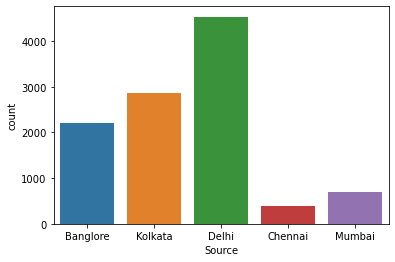

In [42]:
sns.countplot(df_train['Source'])

<AxesSubplot:xlabel='Source', ylabel='count'>

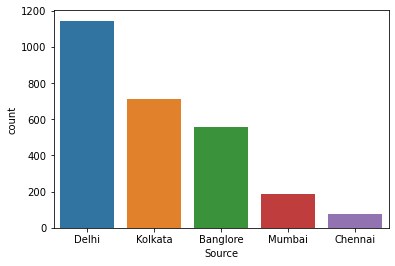

In [43]:
sns.countplot(df_test['Source'])

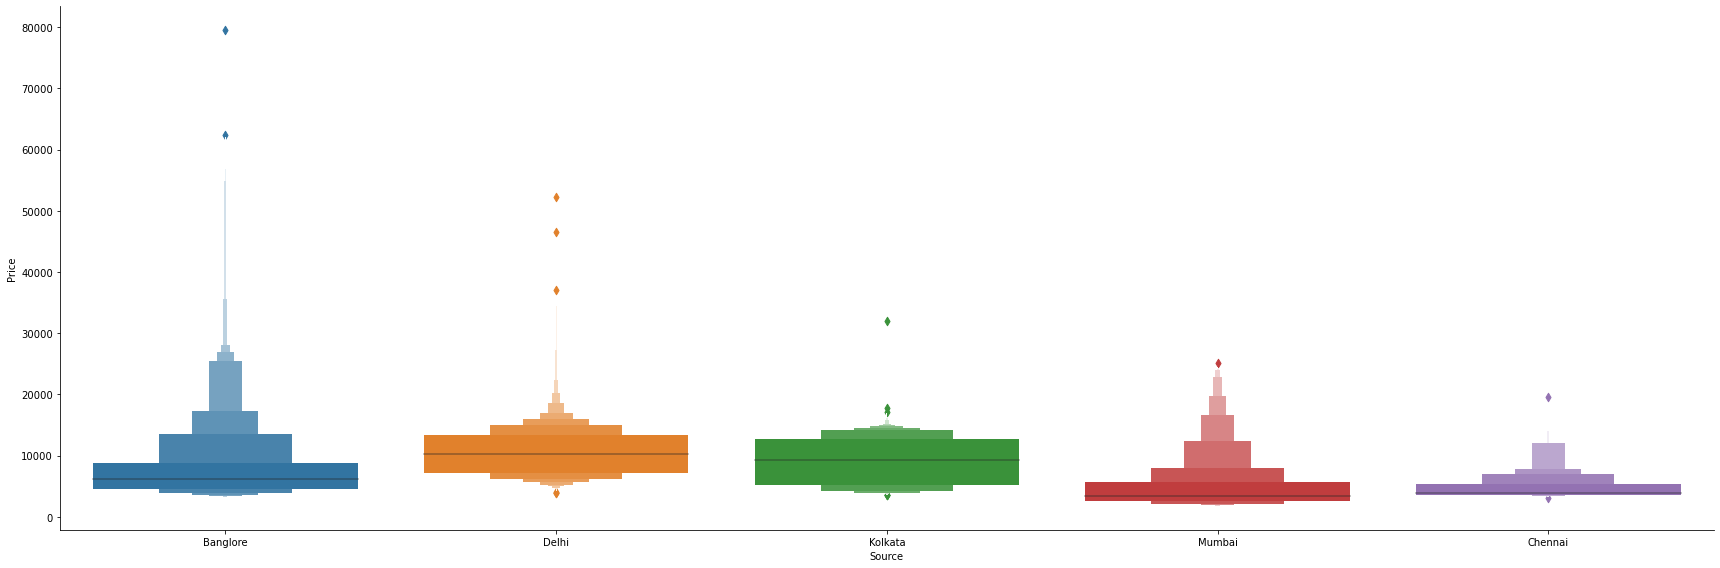

In [44]:
sns.catplot(y= 'Price', x = 'Source' , data= df_train.sort_values('Price', ascending=False), kind='boxen', height=8, aspect=3)


<AxesSubplot:xlabel='Source', ylabel='Price'>

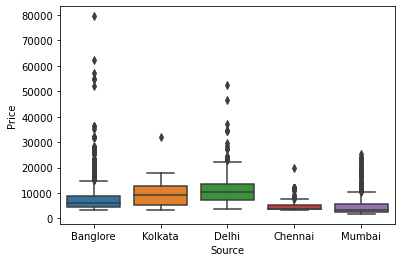

In [45]:
sns.boxplot(y= df_train['Price'] ,x = df_train['Source'])

In [46]:
sources = df_train[['Source']]

In [47]:
sources = pd.get_dummies(sources, drop_first=True)
sources.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [48]:
df_train.drop(['Source'], axis=1, inplace=True)

## Destination

In [49]:
df_train['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [50]:
df_test['Destination'].unique()

array(['Cochin', 'Banglore', 'Delhi', 'New Delhi', 'Hyderabad', 'Kolkata'],
      dtype=object)

In [51]:
for k in df_train.Destination.unique():
    if k not in df_test.Destination.unique():
        print(k)
    else:
        print('Proceed')

Proceed
Proceed
Proceed
Proceed
Proceed
Proceed


<AxesSubplot:xlabel='Destination', ylabel='count'>

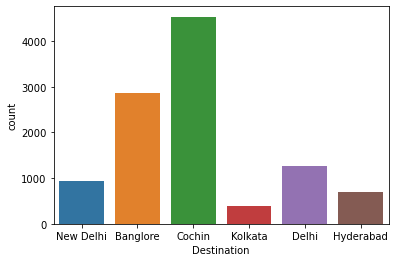

In [52]:
sns.countplot(df_train['Destination'])

<AxesSubplot:xlabel='Destination', ylabel='count'>

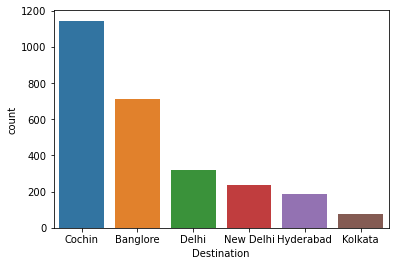

In [53]:
sns.countplot(df_test['Destination'])

In [54]:
destination = df_train[['Destination']]

destination = pd.get_dummies(destination, drop_first=True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [55]:
df_train.drop(['Destination'], axis=1, inplace=True)

## Route

In [56]:
len(df_train['Route'].unique())

128

In [57]:
df_train['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

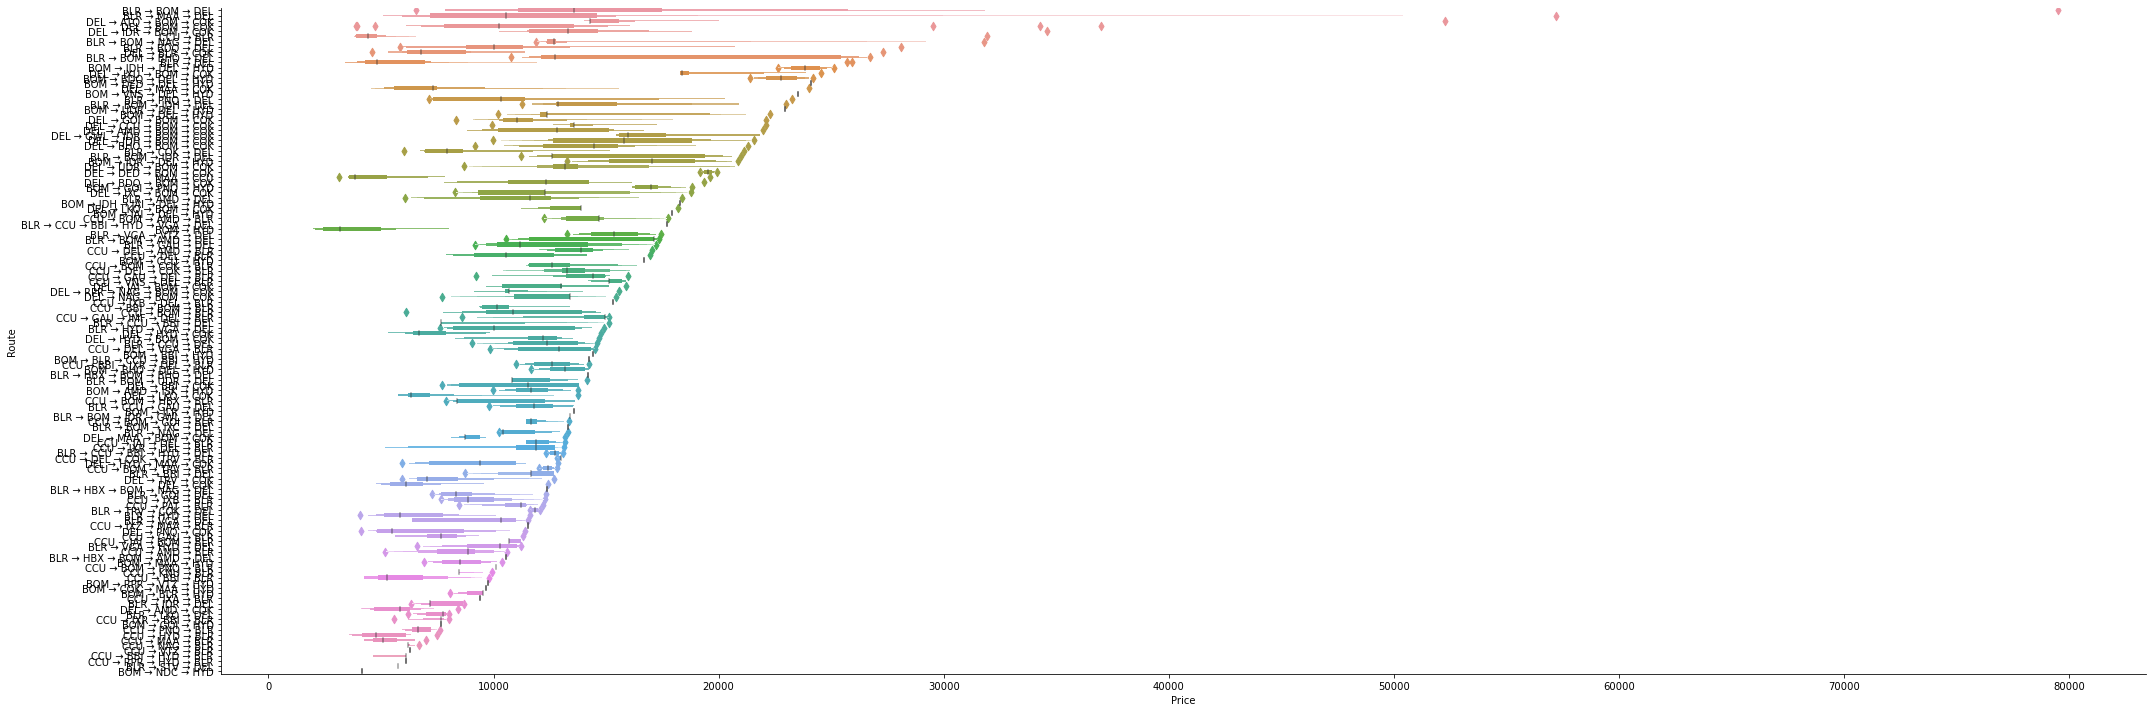

In [58]:
sns.catplot(y= 'Route', x = 'Price', data= df_train.sort_values('Price', ascending=False), kind = 'boxen', height=10, aspect=3)

## the route and the total stops are related to each other .... hence we can drop this route column.

In [59]:
df_train.drop(['Route'], axis=1, inplace=True)
df_test.drop(['Route'], axis=1, inplace=True)


## Dep_Time

In [60]:
df_train['Dep_Time'].value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
16:25      1
12:05      1
01:35      1
22:25      1
21:40      1
Name: Dep_Time, Length: 222, dtype: int64

we take the hours and minute for the departure.

In [61]:
df_train['Dep_hour'] = pd.to_datetime(df_train.Dep_Time ).dt.hour
df_test['Dep_hour'] = pd.to_datetime(df_test.Dep_Time).dt.hour

In [62]:
df_train['Dep_min'] = pd.to_datetime(df_train.Dep_Time ).dt.minute
df_test['Dep_min'] = pd.to_datetime(df_test.Dep_Time).dt.minute

In [63]:
df_train.drop(["Dep_Time"], axis=1, inplace=True)
df_test.drop(["Dep_Time"], axis=1, inplace=True)

## Arrival_Time

In [64]:
df_train.Arrival_Time.value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:25 04 Jun      1
00:10 10 Apr      1
00:40 13 Apr      1
10:55 25 May      1
00:50 16 Jun      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [65]:
df_train['Arr_hour'] = pd.to_datetime(df_train.Arrival_Time ).dt.hour
df_test['Arr_hour'] = pd.to_datetime(df_test.Arrival_Time).dt.hour

In [66]:
df_train['Arr_min'] = pd.to_datetime(df_train.Arrival_Time ).dt.minute
df_test['Arr_min'] = pd.to_datetime(df_test.Arrival_Time).dt.minute

In [67]:
df_train.drop(['Arrival_Time'], axis=1, inplace=True)
df_test.drop(['Arrival_Time'], axis=1, inplace=True)

In [68]:
df_train.head()

,Airline,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


## Duration

In [69]:
df_train.Duration.value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
28h 30m      1
19h 50m      1
13h 35m      1
32h 20m      1
35h 35m      1
Name: Duration, Length: 368, dtype: int64

In [70]:
type(df_train['Duration'])

pandas.core.series.Series

In [71]:
duration = list(df_train['Duration'])

In [72]:
for dur in range(len(duration)):
    if len(duration[dur].split()) != 2:
        if 'h' in duration[dur]:
            duration[dur]= duration[dur] + ' 0m' 
        else:
            duration[dur] = '0h ' + duration[dur]

first_hr = []
second_min = []
for y in range(len(duration)):
    first_hr.append(int(duration[y].split(sep='h')[0]))
    second_min.append(int(duration[y].split(sep='m')[0].split()[-1]))

In [73]:
# duration[0]
# int(duration[0].split(sep='m')[0].split()[-1])

In [74]:
df_train['Duration_hr'] = first_hr
df_train['Duration_min'] = second_min

In [75]:
df_train.head()

,Airline,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hr,Duration_min
0,IndiGo,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [76]:
duration_test = list(df_test['Duration'])

In [77]:
for dur in range(len(duration_test)):
    if len(duration_test[dur].split()) != 2:
        if 'h' in duration_test[dur]:
            duration_test[dur]= duration_test[dur] + ' 0m' 
        else:
            duration_test[dur] = '0h ' + duration_test[dur]

first_test_hr = []
second_test_min = []
for gg in range(len(duration_test)):
    first_test_hr.append(int(duration_test[gg].split(sep='h')[0]))
    second_test_min.append(int(duration_test[gg].split(sep='m')[0].split()[-1]))

In [78]:
first_test_hr

[10,
 4,
 23,
 13,
 2,
 18,
 15,
 5,
 2,
 6,
 28,
 9,
 10,
 4,
 17,
 10,
 9,
 12,
 9,
 9,
 14,
 14,
 11,
 13,
 2,
 12,
 2,
 25,
 19,
 7,
 2,
 11,
 7,
 3,
 1,
 2,
 1,
 6,
 17,
 10,
 2,
 12,
 1,
 23,
 5,
 2,
 23,
 1,
 27,
 13,
 28,
 5,
 26,
 5,
 2,
 2,
 5,
 7,
 5,
 25,
 13,
 26,
 5,
 5,
 2,
 2,
 5,
 8,
 3,
 7,
 1,
 21,
 16,
 7,
 1,
 3,
 2,
 19,
 2,
 14,
 2,
 16,
 5,
 2,
 10,
 13,
 2,
 11,
 2,
 13,
 18,
 28,
 5,
 23,
 1,
 1,
 13,
 6,
 1,
 10,
 4,
 11,
 7,
 12,
 2,
 15,
 1,
 19,
 13,
 12,
 9,
 14,
 2,
 4,
 7,
 23,
 10,
 5,
 22,
 8,
 27,
 11,
 2,
 2,
 5,
 15,
 2,
 2,
 9,
 2,
 8,
 5,
 5,
 2,
 2,
 7,
 19,
 2,
 2,
 12,
 2,
 25,
 10,
 8,
 3,
 12,
 3,
 2,
 12,
 22,
 7,
 7,
 7,
 2,
 2,
 2,
 2,
 2,
 21,
 1,
 3,
 6,
 3,
 2,
 2,
 2,
 26,
 2,
 8,
 2,
 23,
 9,
 2,
 2,
 25,
 2,
 5,
 33,
 15,
 14,
 12,
 1,
 2,
 11,
 10,
 15,
 14,
 8,
 7,
 2,
 13,
 12,
 1,
 10,
 21,
 2,
 26,
 16,
 2,
 9,
 10,
 16,
 22,
 2,
 11,
 2,
 19,
 22,
 11,
 17,
 3,
 23,
 25,
 5,
 7,
 23,
 6,
 14,
 17,
 24,
 2,
 10,
 7,
 2,
 2,
 19

In [79]:
df_test.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,Jet Airways,Delhi,Cochin,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,2h 50m,non-stop,No info,24,6,23,55,2,45


In [80]:
df_test['Duration_hr'] = first_test_hr
df_test['Duration_min'] = second_test_min

In [81]:
df_test.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hr,Duration_min
0,Jet Airways,Delhi,Cochin,10h 55m,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,4h,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,13h,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,2h 50m,non-stop,No info,24,6,23,55,2,45,2,50


In [82]:
df_test.drop(['Duration'], axis=1, inplace=True)
df_train.drop(['Duration'], axis=1, inplace=True)

## More Columns 

In [83]:
df_train.columns

Index(['Airline', 'Total_Stops', 'Additional_Info', 'Price', 'journey_day',
       'journey_month', 'Dep_hour', 'Dep_min', 'Arr_hour', 'Arr_min',
       'Duration_hr', 'Duration_min'],
      dtype='object')

## if data is nominal ------> (not in any order) ------> onehotencoding
## else: ( if there is order) -----> labelEncoding

## Total_Stops

In [84]:
df_train.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

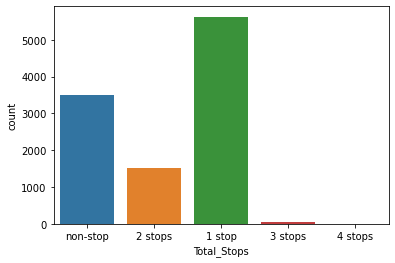

In [85]:
sns.countplot(df_train.Total_Stops)

In [86]:
df_train.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [87]:
df_test.Total_Stops.value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

## Additional_Info

In [88]:
df_train['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='Additional_Info'>

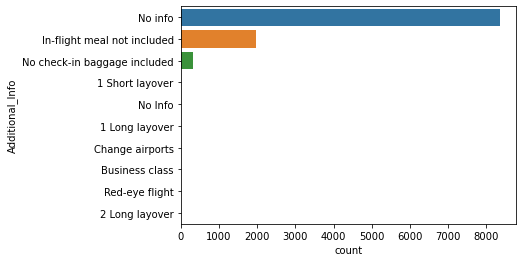

In [89]:
sns.countplot(y=df_train['Additional_Info'])

In [90]:
df_train.Additional_Info.value_counts()


No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [91]:
df_train.drop(['Additional_Info'], axis=1, inplace=True)

## Concatinating the Data

In [92]:
df_train.columns

Index(['Airline', 'Total_Stops', 'Price', 'journey_day', 'journey_month',
       'Dep_hour', 'Dep_min', 'Arr_hour', 'Arr_min', 'Duration_hr',
       'Duration_min'],
      dtype='object')

In [93]:
df_train.head()

,Airline,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hr,Duration_min
0,IndiGo,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,1 stop,13302,1,3,16,50,21,35,4,45


In [94]:
df_train.shape

(10682, 11)

In [95]:
data_train = pd.concat([df_train, Airline, sources, destination], axis=1)

In [96]:
data_train.head()

,Airline,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hr,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,non-stop,3897,24,3,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,Air India,2 stops,7662,1,5,5,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,2 stops,13882,9,6,9,25,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,1 stop,6218,12,5,18,5,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,1 stop,13302,1,3,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1


In [97]:
data_train.drop(['Airline'], axis=1, inplace=True)

In [98]:
data_train.shape

(10682, 30)

In [99]:
data_train.head()

,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hr,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,non-stop,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2 stops,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2 stops,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1 stop,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1 stop,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


## Modifying the Total Stop Column

In [100]:
data_train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [101]:
data_train.replace({"non-stop": 0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}, inplace=True)

In [102]:
data_train.head()

,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hr,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


## Test Data

In [103]:
df_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hr,Duration_min
0,Jet Airways,Delhi,Cochin,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,No info,24,6,23,55,2,45,2,50


In [104]:
df_test.shape

(2671, 13)

## AIrline 

In [105]:
Airline_test = df_test[['Airline']]

In [106]:
Airline_test = pd.get_dummies(Airline_test, drop_first=True)


In [107]:
Airline_test.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


## SOurce and Destination for test

In [108]:
df_test['Source'].unique()

array(['Delhi', 'Kolkata', 'Banglore', 'Mumbai', 'Chennai'], dtype=object)

In [109]:
# source_test = df_test[['Source']]
# destination_test = df_test[['Destination']]

In [110]:
source_test = pd.get_dummies(df_test['Source'], drop_first=True)
destination_test = pd.get_dummies(df_test['Destination'], drop_first=True)

## Additional_Infoand Total Stops

In [111]:
df_test.drop(['Additional_Info'], axis=1, inplace=True)

In [112]:
df_test.Total_Stops.unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [113]:
df_test.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}, inplace=True)

In [114]:
df_test.head(
)

,Airline,Source,Destination,Total_Stops,journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hr,Duration_min
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50


In [115]:
df_test.shape

(2671, 12)

In [116]:
data_test = pd.concat([df_test, Airline_test, source_test, destination_test ], axis=1)

In [117]:
data_test.head()

,Airline,Source,Destination,Total_Stops,journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,...,Airline_Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,...,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,...,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,...,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,...,0,0,0,0,0,0,1,0,0,0


In [118]:
data_test.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

In [119]:
data_test.head()

,Total_Stops,journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hr,Duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


## Feature Selection

In [120]:
data_train.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'Dep_hour',
       'Dep_min', 'Arr_hour', 'Arr_min', 'Duration_hr', 'Duration_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [121]:
data_train.shape

(10682, 30)

In [125]:
data_train.head()

,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hr,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [122]:
X = data_train.loc[:, ['Total_Stops', 'journey_day', 'journey_month', 'Dep_hour',
       'Dep_min', 'Arr_hour', 'Arr_min', 'Duration_hr', 'Duration_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

X.head()

,Total_Stops,journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hr,Duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [124]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

## 1.Heatmap

In [135]:
df_train.corr()

,Price,journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hr,Duration_min
Price,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855
journey_day,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,-0.008940
journey_month,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.016141,-0.040897
Dep_hour,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707
Dep_min,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485
Arr_hour,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309
Arr_min,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628
Duration_hr,0.508778,-0.022059,0.016141,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468
Duration_min,-0.124855,-0.008940,-0.040897,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000


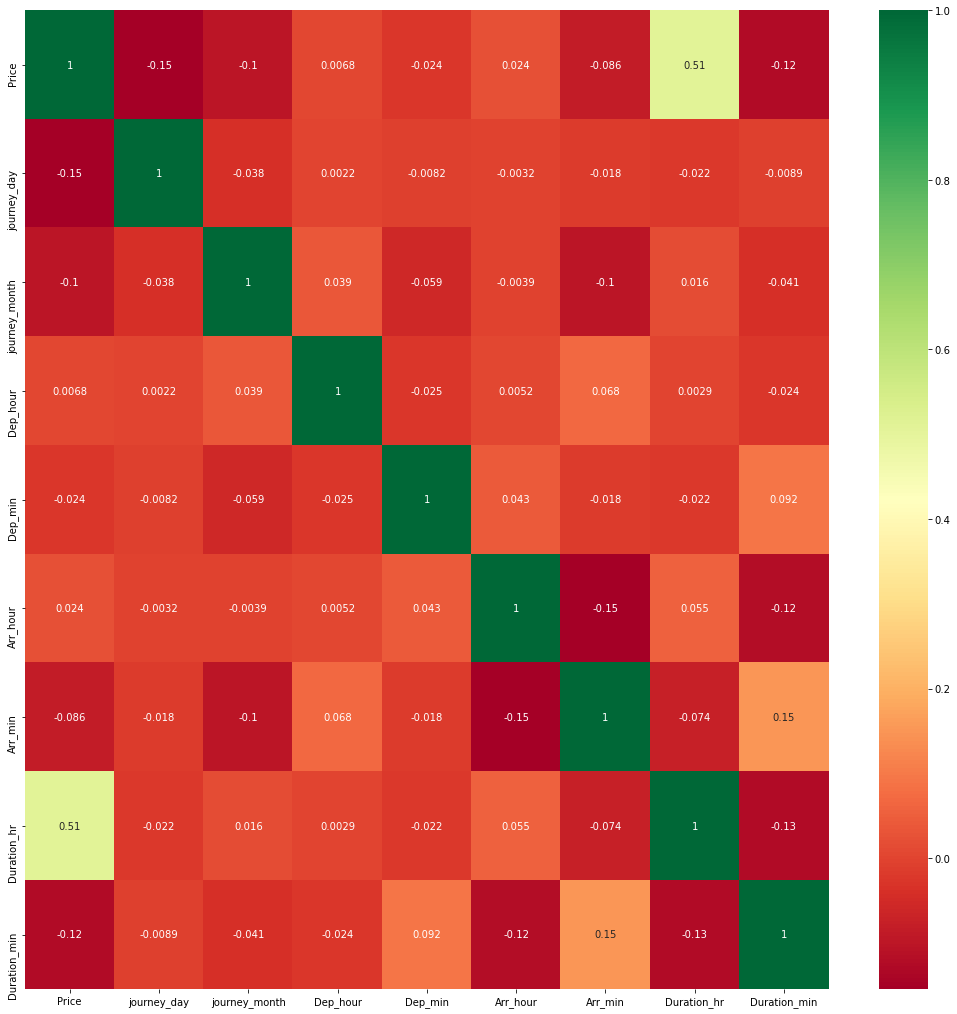

In [138]:
plt.figure(figsize=(18,18))
sns.heatmap(df_train.corr(), annot=True, cmap='RdYlGn')
plt.show()

## 2. feature_importances_

In [139]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [141]:
print(selection.feature_importances_)

[2.33583640e-01 1.43603437e-01 5.29748322e-02 2.48021709e-02
 2.14582165e-02 2.83332790e-02 1.91485397e-02 1.22258991e-01
 1.73277342e-02 9.22586911e-03 1.88742648e-03 1.88720647e-02
 1.32555409e-01 6.70763378e-02 1.86197398e-02 8.14083059e-04
 3.06229909e-03 1.04491456e-04 4.97802479e-03 8.61457999e-05
 5.52477770e-04 9.70278452e-03 3.33543760e-03 6.39148936e-03
 1.11243830e-02 1.67424304e-02 6.08159738e-03 4.90899601e-04
 2.48057691e-02]


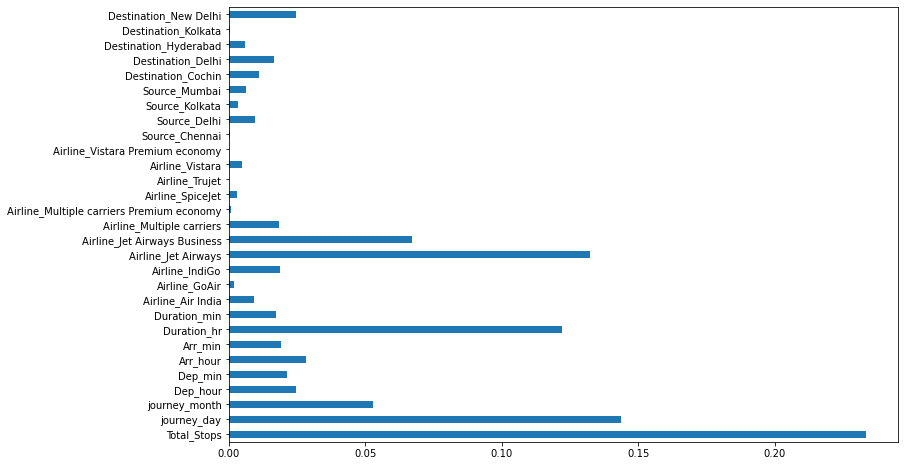

In [150]:
plt.figure(figsize=(12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.show()

## 3. SelectKBest ------> using nlargest(20) -----> 20 best

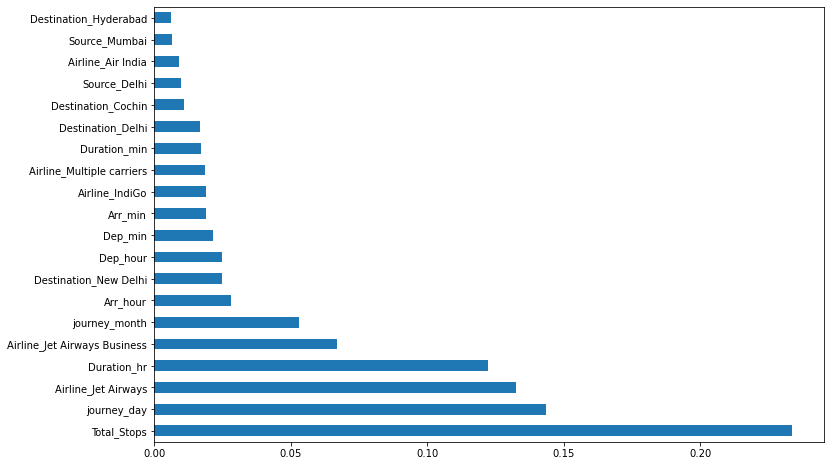

In [148]:
plt.figure(figsize=(12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Fitting and making models

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [153]:
from sklearn.ensemble import RandomForestRegressor


In [154]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [156]:
y_pred = model.predict(X_test)

In [157]:
model.score(X_train,y_train)     # -----> r2 score

0.9533079655470571

In [158]:
model.score(X_test,y_test)       # -----> r2 score

0.7985061728652334

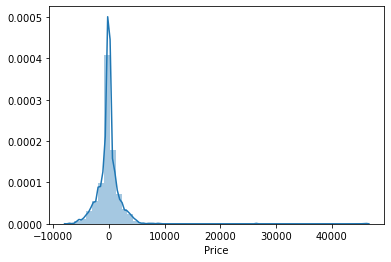

In [160]:
sns.distplot(y_test-y_pred)
plt.show()                        # because we are getting a gaussian distribution which means the distribution is good.

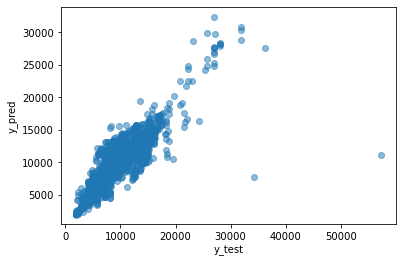

In [168]:
plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()        # the graph is increasing hence the model has been fitted well.

In [165]:
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred))
print('MSE: ', metrics.mean_squared_error(y_test,y_pred))
print('RMSE: ', math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  1174.6579456602253
MSE:  4344621.249650755
RMSE:  2084.375505913163


In [167]:
metrics.r2_score(y_test, y_pred) == model.score(X_test,y_test)

True

## Hyperparameter Tuning

In [169]:
# 1.
from sklearn.model_selection import RandomizedSearchCV

In [173]:
np.linspace(start = 100, stop = 1200, num = 12)

array([ 100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
       1000., 1100., 1200.])

In [178]:
# 2.
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

min_samples_split = [2, 5, 10, 15, 100]

min_samples_leaf = [1, 2, 5, 10]

random_grid = { 'n_estimators': n_estimators,
                 'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf }

In [179]:
model_hypertuned = RandomizedSearchCV(estimator = model, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [180]:

model_hypertuned.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.5s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [181]:
model_hypertuned.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [182]:
y_pred_hypertuned = model_hypertuned.predict(X_test)

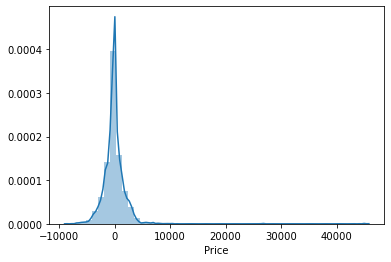

In [187]:
sns.distplot(y_test-y_pred_hypertuned)
plt.show()

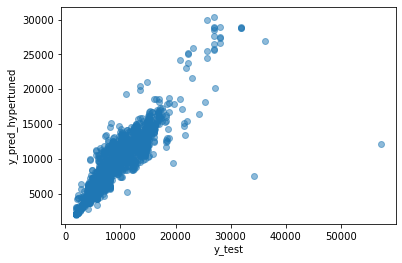

In [189]:
plt.scatter(y_test, y_pred_hypertuned, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred_hypertuned')
plt.show()                       # because it is increasing the model is still good

In [190]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred_hypertuned))
print('MSE: ', metrics.mean_squared_error(y_test,y_pred_hypertuned))
print('RMSE: ', math.sqrt(metrics.mean_squared_error(y_test,y_pred_hypertuned)))

MAE:  1166.7203416343452
MSE:  4058152.894533242
RMSE:  2014.485764291533


In [192]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test,y_pred))
print('RMSE: ', math.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE:  1174.6579456602253
MSE:  4344621.249650755
RMSE:  2084.375505913163


## We see that the hypertuned model is slightly better than the normal model.

In [210]:
scoring = pd.DataFrame({
    'errors': ['MAE', 'MSE', 'RMSE'],
    'Score_normal': [
        metrics.mean_absolute_error(y_test, y_pred), 
        metrics.mean_squared_error(y_test,y_pred),      
        math.sqrt(metrics.mean_squared_error(y_test,y_pred)), 
        ],
    'Score_hypertuned': [
        metrics.mean_absolute_error(y_test, y_pred_hypertuned), 
        metrics.mean_squared_error(y_test,y_pred_hypertuned), 
        math.sqrt(metrics.mean_squared_error(y_test,y_pred_hypertuned))]
    })

scoring.set_index('errors')

scoring

,errors,Score_normal,Score_hypertuned
0,MAE,1.174658e+03,1.166720e+03
1,MSE,4.344621e+06,4.058153e+06
2,RMSE,2.084376e+03,2.014486e+03


## Saving the file...

In [213]:
import pickle

# normal Random Forest model

file1 = open('flight_model_normal.pkl', 'wb')
pickle.dump(model, file1)

In [214]:
# Randomized Search model

file2 = open('flight_model_hypertuned.pkl', 'wb')
pickle.dump(model_hypertuned, file2)